# Experimentación

## Compilado y Preparación

#### Compilamos el código de C++.

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
/bin/bash: cmake: command not found
make: *** No rule to make target 'install'.  Stop.


#### Importamos las librerías necesarias.

In [2]:
import metnum
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pwd
!python --version

/home/erica/Documents/tomi/Metodos/metodos-tp3-20200719T031006Z-001/metodos-tp3/notebooks
Python 3.6.9


#### Importamos los datos de entrenamiento y test.

In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

display(train)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,119879,bonita casas de 2 recamaras a 10 minutos del c...,vendo casa en bosques de ica residencial a 10 ...,Casa,BOSQUES,Zinacantepec,Edo. de México,0.0,2.0,2.0,...,53666.0,NaN,NaN,2015-02-08 00:00:00,0.0,0.0,0.0,0.0,0.0,650000.0
239996,259178,casa en condominio a 10 min. del centro de toluca,"casa con un jardin amplio, un cuarto de servic...",Casa,Filiberto Navas 325,Toluca,Edo. de México,0.0,3.0,3.0,...,51954.0,19.294665,-99.692916,2014-07-10 00:00:00,0.0,0.0,0.0,1.0,1.0,1940000.0
239997,131932,nicolas san juan,"departamento con excelente ubicación, muy cerc...",Apartamento,Nicolas San Juan,Benito Juárez,Distrito Federal,20.0,2.0,1.0,...,50003995.0,NaN,NaN,2015-03-03 00:00:00,0.0,0.0,0.0,0.0,0.0,3400000.0
239998,146867,casa sola. javier rojo gomez.,"casa sola, dividida en cuatro departamentos de...",Casa,Javier Rojo Gomez 120,Iztapalapa,Distrito Federal,20.0,4.0,0.0,...,24162.0,19.366651,-99.082246,2014-12-26 00:00:00,1.0,0.0,0.0,1.0,1.0,2890000.0


In [4]:
list(train.columns)

['id',
 'titulo',
 'descripcion',
 'tipodepropiedad',
 'direccion',
 'ciudad',
 'provincia',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'idzona',
 'lat',
 'lng',
 'fecha',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'precio']

## Caso 1 - Metros Cubiertos vs. Precio

#### Consideremos como caso ajustar el precio en función del tamaño de la casa en metros para 100 casas del conjunto de datos.

In [5]:
# Tomo una muestra de 100 viviendas del conjunto que tengan todos los campos completos (No queremos ningún "NaN" en los datos).
train_100 = train.dropna().sample(100)

x_data = train_100["metroscubiertos"].values
y_data = train_100["precio"].values

display(train_100[["id", "metroscubiertos", "precio"]])

,id,metroscubiertos,precio
63002,165662,90.0,520000.0
40880,1798,108.0,1300000.0
157047,32818,170.0,1890000.0
211164,238708,261.0,3149000.0
6048,171492,54.0,330000.0
...,...,...,...
110569,218066,150.0,2750000.0
142812,78886,60.0,440000.0
182034,21183,100.0,1855000.0
105806,194373,139.0,5250000.0


count    100.000000
mean     151.420000
std       83.778349
min       42.000000
25%       78.750000
50%      132.000000
75%      205.500000
max      360.000000
Name: metroscubiertos, dtype: float64

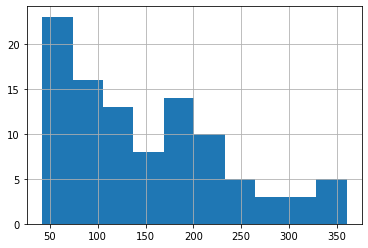

In [6]:
# Veamos un poco de info sobre los metros cubiertos de las viviendas elegidas.
display(train_100["metroscubiertos"].describe())
train_100["metroscubiertos"].hist()

count    1.000000e+02
mean     2.077386e+06
std      2.024709e+06
min      3.300000e+05
25%      7.725000e+05
50%      1.525000e+06
75%      2.562500e+06
max      1.250000e+07
Name: precio, dtype: float64

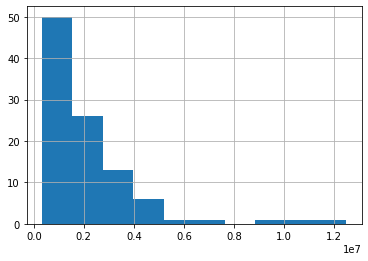

In [7]:
# Veamos un poco de info sobre los precios de las viviendas elegidas.
display(train_100["precio"].describe())
train_100["precio"].hist()

In [8]:
# Ajustamos.
ajuste = metnum.LinearRegression()
ajuste.fit(x_data, y_data)

#### Ya hecho el ajuste hagamos un gráfico de los datos y del ajuste hallado para comprobar que el algoritmo funcionó correctamente.

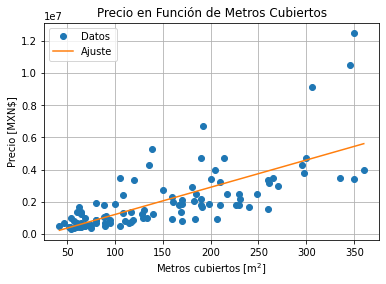

In [9]:
x_graph = np.linspace(np.min(x_data), np.max(x_data), 1000)
y_graph = ajuste.predict(x_graph)

y_graph = y_graph.reshape(y_graph.shape[0])

plt.figure(1)
plt.title("Precio en Función de Metros Cubiertos")
plt.plot(x_data, y_data, "o", label="Datos")
plt.plot(x_graph, y_graph, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.show()

#### Notemos que el ajuste parece ser razonable pero claramente se ve afectado por outliers y no determina muy bien el verdadero precio de las viviendas. Veamos el RMSE y el RMSLE del ajuste.

In [10]:
def RMSE(data, prediction):
    assert len(data) == len(prediction)
    
    N = len(data)
    sum = 0
    for i in range(N):
        sum = sum + (data[i] - prediction[i]) ** 2
    
    return np.sqrt(sum / N)


def RMSLE(data, prediction):
    assert len(data) == len(prediction)
    
    N = len(data)
    sum = 0
    for i in range(N):
        sum = sum + (np.log(data[i] + 1) - np.log(prediction[i] + 1)) ** 2
    
    return np.sqrt(sum / N)

In [11]:
y_prediction = ajuste.predict(x_data)
y_prediction = y_prediction.reshape(y_prediction.shape[0])

rmse = RMSE(y_data, y_prediction)
rmsle = RMSLE(y_data, y_prediction)

print("RMSE =", rmse)
print("RMSLE =", rmsle)

RMSE = 1438730.8664447286
RMSLE = 0.5347309129722824


#### Notemos que el RMSE es muchísimo mayor que el RMSLE. Esto es razonable, ya que el RMSE es del orden del precio de las viviendas (de los millones de pesos) debido a los outliers. Sin embargo, el RMSLE no se ve tan afectado por outliers ya que es esencialmente el logaritmo del error relativo del ajuste; no del error absoluto.

## Kfold Cross Validation

#### De los datos que tenemos para entrenar a nuestro programa se lo divide en k subsecciones, de estas se toman k-1 para hacer el entrenamiento y 1 para el testeo de los resultados del predic.Se puede osbervar si el metodo es consistente , repitiendo este procedimiento k veces donde cada subsección solo puede ser utilizada para testear una sola vez
#### Nos permite aproximar con mayor robustez el error generado por la implementacion.

In [12]:
from sklearn.model_selection import KFold

##Tenenemos los datos en train 
#el set de datos de test no tiene la columna precios para verificar así que no sirve para validar con más datos
trainC = train.dropna()
x_cross = trainC["metroscubiertos"].values

y_cross = trainC["precio"].values
kf = KFold(n_splits=10)
kf.get_n_splits(x_data)
RMSE_array = np.array([])
RMSLE_array = np.array([])
for train_index, test_index in kf.split(x_cross):
    x_ctrain = x_cross[train_index]
    y_ctrain = y_cross[train_index]
    x_ctest = x_cross[test_index]
    y_ctest = y_cross[test_index]
    ajusteC = metnum.LinearRegression()
    ajusteC.fit(x_ctrain, y_ctrain)
    predictC = ajusteC.predict(x_ctest)
    predictC = predictC.reshape(predictC.shape[0])
    rmse = RMSE(y_ctest, predictC)
    rmsle = RMSLE(y_ctest, predictC)
    RMSE_array  = np.append(RMSE_array,rmse)
    RMSLE_array  = np.append(RMSLE_array, rmsle)
print(RMSE_array)
    
print("RMSE-> Promedio: ", np.mean(RMSE_array) ,"Varianza: " , np.sqrt(np.var(RMSE_array)))
print("RMSLE-> Promedio: ", np.mean(RMSLE_array), "Varianza: " , np.sqrt(np.var(RMSLE_array)))

    ##se ven bastante similares a simple vista

[1419943.12181171 1419747.33671438 1442116.52801039 1411751.87374066
 1438019.07225639 1458978.86571084 1470355.00645079 1440611.03616442
 1404868.72384729 1410485.96222912]
RMSE-> Promedio:  1431687.7526935996 Varianza:  20772.955249196766
RMSLE-> Promedio:  0.5902847322266187 Varianza:  0.004935591655686844



#### Ambos RMSE y RMSLE tienen una varianza pequeña mostrando la consistencia del metodo implementado  

## Caso 2 - Latitud y Longitud vs. Precio

#### Veamos ahora cómo el precio varía dependiendo de la ubicación de la vivienda. Para eso vamos a usar la latitud y longitud y vamos a ajustar el precio a esas variables.

In [13]:
# Tomo una muestra de 500 viviendas del conjunto que tengan todos los campos completos (No queremos ningún "NaN" en los datos).
# Elijo un seed ya que la imagen de fondo en el grafico esta elegida para cierto rango de latitudes y longitudes.
# El numero 6 lo saque de tirar un dado, te lo juro ;)
seed = np.random.seed(6)
train_500 = train.dropna().sample(500, random_state=seed)

deberian_ser_nan = list(set(train_500.index[train_500["lng"] == 0.0].tolist() + train_500.index[train_500["lat"] == 0.0].tolist()))
train_500 = train_500.drop(labels=deberian_ser_nan, axis=0)

x_data = train_500[["lng", "lat"]].values
y_data = train_500["precio"].values

display(train_500[["id", "lng", "lat", "precio"]])

,id,lng,lat,precio
200798,228260,-98.285556,18.981585,2320000.0
220758,267456,-99.174928,19.362644,4195000.0
84876,41117,-101.052533,22.160978,1550000.0
199046,62538,-99.244690,19.569223,2000000.0
58916,59684,-98.352682,19.113104,1190000.0
...,...,...,...,...
164978,262627,-99.203004,18.799797,1400000.0
18277,287722,-101.721489,21.156781,1700000.0
230810,168217,-99.081923,19.614459,2500000.0
60594,93244,-103.427256,20.609078,1200000.0


In [14]:
print("Rango de Longitud:", (np.min(x_data[:, 0]), np.max(x_data[:, 0])))
print("Rango de Latitud:", (np.min(x_data[:, 1]), np.max(x_data[:, 1])))

Rango de Longitud: (-117.05260661090084, -86.82080286794434)
Rango de Latitud: (16.734008226454566, 32.5864807)


In [15]:
ajuste = metnum.LinearRegression()
ajuste.fit(x_data, y_data)

In [16]:
'''

Creamos una cuadrilla de 1000x1000 valores de latitud y longitud entre el mínimo y el máximo.

Por ejemplo, supongamos que lng = [0, 1, 2] y lat = [0, 1, 2]. Entonces:

LNG = [
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2]
]

LAT = [
    [0, 0, 0],
    [1, 1, 1],
    [2, 2, 2]
]

Lo que queremos entonces es usar el ajuste para obtener otra cuadrilla:

y = [
    [f(0, 0), f(1, 0), f(2, 0)],
    [f(0, 1), f(1, 1), f(2, 1)],
    [f(0, 2), f(1, 2), f(2, 2)]
]

donde f(lng, lat) es la función que ajustamos.

'''

lng_graph = np.linspace(np.min(x_data[:, 0]), np.max(x_data[:, 0]), 1000)
lat_graph = np.linspace(np.min(x_data[:, 1]), np.max(x_data[:, 1]), 1000)
LNG_graph, LAT_graph = np.meshgrid(lng_graph, lat_graph)

y_graph = []
for i in range(LNG_graph.shape[0]):
    lng_lat_row = np.column_stack([LNG_graph[i], LAT_graph[i]])
    y_row = ajuste.predict(lng_lat_row)
    y_row = y_row.reshape(y_row.shape[0])
    y_graph.append(y_row)
y_graph = np.asarray(y_graph)

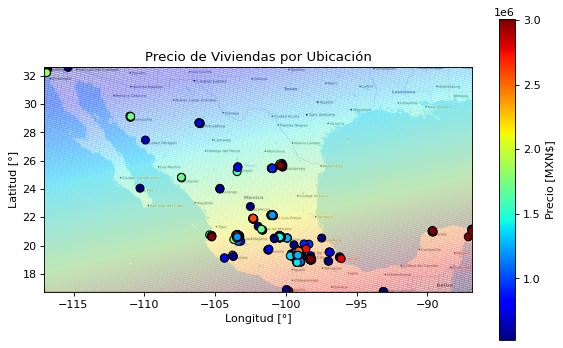

In [17]:
from matplotlib.colors import Normalize

mi = np.min(y_graph)
ma = np.max(y_graph)
norm = Normalize(vmin=mi,vmax=ma)

# El mapa lo saqué de openstreetmap.com.
mexico = plt.imread("mapa_mexico.png")
BBox = (np.min(x_data[:, 0]), np.max(x_data[:, 0]), np.min(x_data[:, 1]), np.max(x_data[:, 1]))

plt.figure(2, figsize=(690 / 80, 425 / 80), dpi=80)
plt.title("Precio de Viviendas por Ubicación")
plt.imshow(mexico, extent=BBox, aspect='equal', alpha=1)
plt.contourf(LNG_graph, LAT_graph, y_graph, 200, alpha=0.2, norm=norm, cmap="jet")
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, s=50, norm=norm, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.show()

#### Notemos que la linealidad del ajuste se refleja en la linealidad del gradiente de colores de fondo que representa la predicción para cada punto del mapa. Según este ajuste las viviendas más caras se encuentran en la costa sur del atlántico. Esta costa es la del caribe, por lo tanto el resultado es razonable. Sin embargo, al ser un ajuste lineal no hay mucha más información que podamos sacar al respecto ya que no puede dividir por zonas.

#### Veamos los errores.

In [18]:
y_prediction = ajuste.predict(x_data)
y_prediction = y_prediction.reshape(y_prediction.shape[0])

rmse = RMSE(y_data, y_prediction)
rmsle = RMSLE(y_data, y_prediction)

print("RMSE =", rmse)
print("RMSLE =", rmsle)

RMSE = 1856652.4566782059
RMSLE = 0.8516641969707008


#### KFold Cross Validation

In [19]:
trainC = train.dropna()
x_cross = trainC[["lng", "lat"]].values


y_cross = trainC["precio"].values
kf = KFold(n_splits=5)
#kf.get_n_splits(x_data)
RMSE_array = np.array([])
RMSLE_array = np.array([])
for train_index, test_index in kf.split(x_cross):
    x_ctrain = x_cross[train_index]
    y_ctrain = y_cross[train_index]
    x_ctest = x_cross[test_index]
    y_ctest = y_cross[test_index]
    
    ajusteC = metnum.LinearRegression()
    ajusteC.fit(x_ctrain, y_ctrain)
    predictC = ajusteC.predict(x_ctest)
    predictC = predictC.reshape(predictC.shape[0])
    rmse = RMSE(y_ctest, predictC)

    negativos = np.argwhere(predictC<0)

    y_ctest = np.delete(y_ctest, np.argwhere(predictC<0))
    predictC = np.delete(predictC, np.argwhere(predictC<0))
    rmsle = RMSLE(y_ctest, predictC)
    RMSE_array  = np.append(RMSE_array,rmse)
    RMSLE_array  = np.append(RMSLE_array, rmsle)
###print(RMSE_array)
print("Promedio y varianza del error para el caso lineal" )    
print("RMSE-> Promedio: ", np.mean(RMSE_array) ,"Varianza: " , np.sqrt(np.var(RMSE_array)))
print("RMSLE-> Promedio: ", np.mean(RMSLE_array), "Varianza: " , np.sqrt(np.var(RMSLE_array)))


Promedio y varianza del error para el caso lineal
RMSE-> Promedio:  1781566.4381611855 Varianza:  23502.93842001957
RMSLE-> Promedio:  0.8204499545206414 Varianza:  0.004082388249488265


## Caso 3: Precios de Viviendas en Cancún

#### Estudiemos ahora los precios por ubicación pero segmentando a sólo las viviendas en Cancún y permitámosle al ajuste tomar un orden más de libertad para cada variable.

In [20]:
print("Provincias:", train.provincia.unique())

QuintanaRoo = train[train["provincia"] == "Quintana Roo"]
print("Ciudades de Quintana Roo:", QuintanaRoo.ciudad.unique())

Provincias: ['Distrito Federal' 'Jalisco' 'Edo. de México' 'Oaxaca' 'Quintana Roo'
 'Colima' 'San luis Potosí' 'Nuevo León' 'Querétaro' 'Tamaulipas' 'Puebla'
 'Yucatán' 'Morelos' 'Guerrero' 'Tabasco' 'Guanajuato' 'Hidalgo'
 'Veracruz' 'Chihuahua' 'Aguascalientes' 'Sonora' 'Michoacán'
 'Baja California Norte' 'Baja California Sur' 'Coahuila' 'Durango'
 'Sinaloa' 'Chiapas' 'Nayarit' 'Tlaxcala' 'Campeche' 'Zacatecas' nan]
Ciudades de Quintana Roo: ['Playa del Carmen' 'Cancún' 'Solidaridad' 'Chetumal' 'Bacalar' 'Tulum'
 'Cozumel' 'José María Morelos' 'Othón P. Blanco' nan 'Lázaro Cárdenas'
 'Felipe Carrillo Puerto' 'Isla Mujeres']


In [21]:
cancun = train[train["ciudad"] == "Cancún"].dropna()

In [22]:
# Defino los límites a mano para obtener viviendas en la zona más poblada de Cancún.
outliers = list(set(cancun.index[cancun["lng"] > -86.74].tolist() +
                    cancun.index[cancun["lng"] < -86.92].tolist() +
                    cancun.index[cancun["lat"] > 21.20].tolist() +
                    cancun.index[cancun["lat"] < 21.05].tolist()))
cancun = cancun.drop(labels=outliers, axis=0)
display(cancun)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
87,166800,casa en fraccionamiento cerado,<p>bonita y fresca casa de 1 nivel en fraccion...,Casa,"FRACC, PASEOS DEL CARIBE",Cancún,Quintana Roo,10.0,2.0,2.0,...,50003005.0,21.135203,-86.870866,2013-09-09 00:00:00,0.0,0.0,0.0,1.0,1.0,580000.0
525,83002,villas del caribe,<p>&nbsp;</p>\r\n<p class=dp-comments>&nbsp;&n...,Casa,villas de tequesquitengo,Cancún,Quintana Roo,4.0,2.0,2.0,...,50003045.0,21.139288,-86.885093,2015-09-08 00:00:00,0.0,0.0,0.0,1.0,1.0,580000.0
1279,272335,venta casa en residencial cumbres caucaso canc...,estrene casa en cumbres su mejor opción donde ...,Casa,CUMBRES,Cancún,Quintana Roo,1.0,3.0,2.0,...,50002774.0,21.109531,-86.844514,2015-10-12 00:00:00,0.0,0.0,1.0,1.0,1.0,3900000.0
1523,197522,preventa de exclusivos departamentos en cancún,exclusivo desarrollo residencial destinado a p...,Apartamento,PALMARIS,Cancún,Quintana Roo,0.0,3.0,2.0,...,50002982.0,21.114115,-86.851013,2016-12-01 00:00:00,1.0,1.0,1.0,1.0,1.0,2950445.0
2132,59618,departamento en venta sm 64 sobre av.bonampak ...,departamento en venta sm 64 sobre av.bonampak ...,Apartamento,AV BONAMPAK,Cancún,Quintana Roo,20.0,2.0,2.0,...,50002921.0,21.175684,-86.819914,2016-08-05 00:00:00,0.0,0.0,0.0,1.0,1.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238826,251147,casa en venta en ciudad de cancún,preciosa casa ubicada en una calle tranquila e...,Casa,Jazmin,Cancún,Quintana Roo,9.0,2.0,1.0,...,50003428.0,21.131782,-86.861300,2012-09-13 00:00:00,0.0,0.0,0.0,0.0,0.0,800000.0
239241,95462,oportunidad casa en cancun en venta sm. 50 est...,"<p>hermosa casa , estilo mediterraneo,&nbsp; s...",Casa,SM:50 Calle Mazamitla por avenida Kohunlich y ...,Cancún,Quintana Roo,7.0,3.0,2.0,...,50003433.0,21.145880,-86.849974,2013-02-01 00:00:00,0.0,0.0,0.0,1.0,1.0,1350000.0
239424,275987,casa venta sm 64 lote 17 cancun,casa en venta muy cerca de la avenida lopéz po...,Casa,"Sm 64, Mz 19 Lote 17",Cancún,Quintana Roo,5.0,3.0,0.0,...,50002774.0,21.177389,-86.818979,2016-07-15 00:00:00,0.0,0.0,0.0,1.0,1.0,1150000.0
239445,156542,casa en venta en ciudad de cancún,hermosa residencia familiar en el mejor reside...,Casa,Cumbres de Maltrata 6,Cancún,Quintana Roo,1.0,3.0,3.0,...,50003428.0,21.110805,-86.838984,2012-04-18 00:00:00,0.0,0.0,1.0,1.0,1.0,3500000.0


In [23]:
# Son muchas viviendas, tomemos una muestra de 200 del conjunto.
seed = np.random.seed(6)
cancun = cancun.sample(200, random_state=seed)

In [24]:
x_data = cancun[["lng", "lat"]].values
y_data = cancun["precio"].values

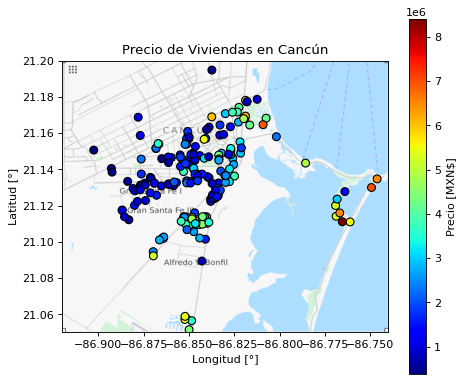

In [25]:
# El mapa lo saqué de openstreetmap.com.
mapa_cancun = plt.imread("mapa_cancun.png")
BBox = (-86.92, -86.74, 21.05, 21.20)

plt.figure(3, figsize=(526 / 80, 470 / 80), dpi=80)
plt.title("Precio de Viviendas en Cancún")
plt.imshow(mapa_cancun, extent=BBox, aspect='equal', alpha=1)
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, s=50, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.show()

In [26]:
# Agrego lng^2, lng * lat y lat^2 a las variables del ajuste.
x_fit = np.column_stack([x_data, x_data[:, 0] ** 2, x_data[:, 0] * x_data[:, 1], x_data[:, 1] ** 2])
y_fit = y_data

In [27]:
ajuste = metnum.LinearRegression()
ajuste.fit(x_fit, y_fit)

In [28]:
lng_graph = np.linspace(-86.92, -86.74, 1000)
lat_graph = np.linspace(21.05, 21.20, 1000)
LNG_graph, LAT_graph = np.meshgrid(lng_graph, lat_graph)

y_graph = []
for i in range(LNG_graph.shape[0]):
    rows = np.column_stack([LNG_graph[i], LAT_graph[i], LNG_graph[i] ** 2, LNG_graph[i] * LAT_graph[i], LAT_graph[i] ** 2])
    y_row = ajuste.predict(rows)
    y_row = y_row.reshape(y_row.shape[0])
    y_graph.append(y_row)
y_graph = np.asarray(y_graph)

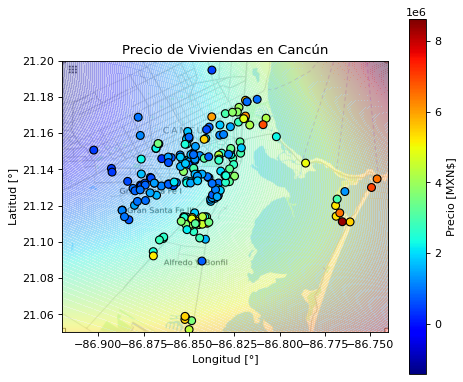

In [29]:
mi = np.min(y_graph)
ma = np.max(y_graph)
norm = Normalize(vmin=mi,vmax=ma)

plt.figure(4, figsize=(526 / 80, 470 / 80), dpi=80)
plt.title("Precio de Viviendas en Cancún")
plt.imshow(mapa_cancun, extent=BBox, aspect='equal', alpha=1)
plt.contourf(LNG_graph, LAT_graph, y_graph, 200, alpha=0.2, norm=norm, cmap="jet")
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, s=50, norm=norm, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.show()

#### Notemos que como era esperable las viviendas cercanas a la costa son más caras que las alejadas de la costa. Se puede comprobar usando los puntos de la muestra que el ajuste es correcto.

In [30]:
y_prediction = ajuste.predict(x_fit)
y_prediction = y_prediction.reshape(y_prediction.shape[0])

# Por algun motivo hay un elemento negativo (solo uno :/)
y_prediction= np.abs(y_prediction)        

rmse = RMSE(y_fit, y_prediction)
rmsle = RMSLE(y_fit, y_prediction)

print("RMSE =", rmse)
print("RMSLE =", rmsle)

RMSE = 1273748.1989742531
RMSLE = 0.5680886216926475


#### K fold Validation

#### Voy a agregar el metodo lineal para ver la diferencia en los errores con el cuadratico utilizado 

#### Hago una funcion para dejar de copiar y pegar que ya estaba quedando re feo 

In [31]:
###Defino una funcion 
def K_fold(x_cross,y_cross , k):
    kf = KFold(n_splits=k)
    #kf.get_n_splits(x_data)
    RMSE_array = np.array([])
    RMSLE_array = np.array([])
    for train_index, test_index in kf.split(x_cross):
        x_ctrain = x_cross[train_index]
        y_ctrain = y_cross[train_index]
        x_ctest = x_cross[test_index]
        y_ctest = y_cross[test_index]

        ajusteC = metnum.LinearRegression()
        ajusteC.fit(x_ctrain, y_ctrain)
        predictC = ajusteC.predict(x_ctest)
        predictC = predictC.reshape(predictC.shape[0])
        rmse = RMSE(y_ctest, predictC)

        negativos = np.argwhere(predictC<0)

        y_ctest = np.delete(y_ctest, np.argwhere(predictC<0))
        predictC = np.delete(predictC, np.argwhere(predictC<0))
        rmsle = RMSLE(y_ctest, predictC)
        RMSE_array  = np.append(RMSE_array,rmse)
        RMSLE_array  = np.append(RMSLE_array, rmsle)
    ###print(RMSE_array)
    
    print("RMSE-> Promedio: ", np.mean(RMSE_array) ,"Varianza: " , np.sqrt(np.var(RMSE_array)))
    print("RMSLE-> Promedio: ", np.mean(RMSLE_array), "Varianza: " , np.sqrt(np.var(RMSLE_array)))

    


In [32]:
trainC = train.dropna()
cancun = trainC[trainC["ciudad"] == "Cancún"].dropna()
cancun = cancun.drop(labels=outliers, axis=0) ### la unica diferencia es que no hago lo redusco a 200 elementos después 

x_cross = trainC[["lng", "lat"]].values
y_cross = trainC["precio"].values
print("Error para aproximacion lineal")
K_fold(x_cross,y_cross , 5)
x_cross  = np.column_stack([x_cross, x_cross[:, 0] ** 2, x_cross[:, 0] * x_cross[:, 1], x_cross[:, 1] ** 2])
print("Error para aproximacion cuadratica")

K_fold(x_cross,y_cross,5)


Error para aproximacion lineal
RMSE-> Promedio:  1781566.4381611855 Varianza:  23502.93842001957
RMSLE-> Promedio:  0.8204499545206414 Varianza:  0.004082388249488265
Error para aproximacion cuadratica
RMSE-> Promedio:  1781396.6600676067 Varianza:  19067.61142545639
RMSLE-> Promedio:  0.8211284665922151 Varianza:  0.004374598224592668


## Análisis de las descripciones

#### Voy a analizar la aparición de palabras "positivas" en las descripciones y observar el resultado al agregarlo como dato en nuestras aproximaciones anteriores

In [33]:
list(train.columns)
display(train["descripcion"][500])


'exc.casa con una vista preciosa verde, muy buenos acabados, 2 terrazas muy bonitas, jardin comun de 400m2 , cuarto de tele, cuarto de juegos, antecomedor, cava, bodega. \nno se negocia el precio'

#### Esta es la lista de palabras que buscaremos

In [34]:
positivas = ["hospital", "escuela" , "colegio" , "luminoso", "espaciado" , "estacionamiento", "espacioso" , "bonito" , "tranquilidad" , "preciosa" , "precioso" ]

In [35]:

listaP = np.array([])
trainP = train.dropna()
for descripcion in (trainP["descripcion"]):
    totales = 0;
    for palabra in positivas:
        if(palabra in descripcion):
            totales += 1      
    listaP = np.append(listaP, totales)


#### agrego al la cuentas hechas anteriormente par ala latitud y longitud estos datos de forma lineales

In [36]:
trainC = train.dropna()
cancun = trainC[trainC["ciudad"] == "Cancún"].dropna()
cancun = cancun.drop(labels=outliers, axis=0) ### la unica diferencia es que no hago lo redusco a 200 elementos después 

x_cross = trainC[["lng", "lat"]].values
x_cross = np.column_stack([x_cross, listaP])
y_cross = trainC["precio"].values
print("Error para aproximacion lineal con la lista de descripciones positivas")
K_fold(x_cross,y_cross,5)
###ver que x_cross ya tenia el listaP
x_cross  = np.column_stack([x_cross, x_cross[:, 0] ** 2, x_cross[:, 0] * x_cross[:, 1], x_cross[:, 1] ** 2])
y_cross = trainC["precio"].values

print("Error para aproximacion cuadratica con la lista de descripciones positivas")
K_fold(x_cross,y_cross,5)


Error para aproximacion lineal con la lista de descripciones positivas
RMSE-> Promedio:  1779619.819273162 Varianza:  23340.442847431805
RMSLE-> Promedio:  0.819713049642995 Varianza:  0.0038973445715183353
Error para aproximacion cuadratica con la lista de descripciones positivas
RMSE-> Promedio:  1779286.6522653953 Varianza:  19254.077304722632
RMSLE-> Promedio:  0.8198741487323579 Varianza:  0.004039428575925442
